In [1]:
import numpy as np
import pandas as pd


from plot_utils import *


DATA_PATH_EXP_1 = "../../data/prolific/exp_1/"
DATA_PATH_EXP_2 = "../../data/prolific/exp_2/"
DATA_PATH_EXPERT = "../../data/ratings/expert_combined.csv"
N_TRIALS_EXP_1 = 30
N_TRIALS_EXP_2 = 42

PLOT_DIR = "./plots"

# Compute average of average ratings for each survey type
df_long_exp_1 = pd.read_csv(DATA_PATH_EXP_1 + "main_01_long.csv")
df_long_exp_2 = pd.read_csv(DATA_PATH_EXP_2 + "main_02_long.csv")
df_expert = pd.read_csv(DATA_PATH_EXPERT)

# Experiment 1

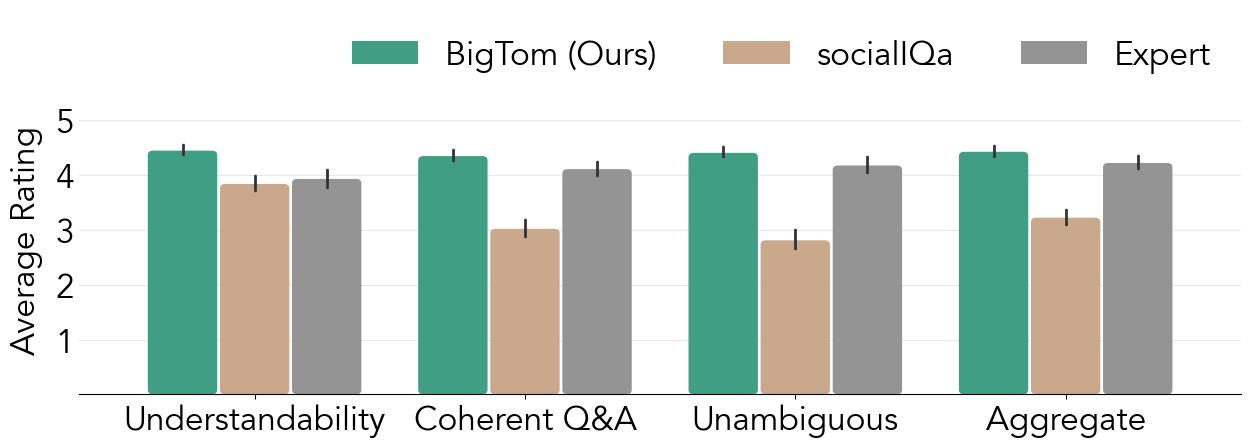

In [2]:

# averaging across items to get worker level accuracy
df_long_exp_1 = df_long_exp_1.groupby(['survey_type', 'worker_id'])[['unambiguous', 'coherent_q_a', 'understandability', 'average_rating']].mean().reset_index()
survey_types = ["unambiguous", "coherent_q_a", "understandability", "average_rating"]
medians = [df_long_exp_1.groupby(["survey_type"])[type].mean().tolist() for type in survey_types] # changed this to mean now!
cis = [df_long_exp_1.groupby(["survey_type"])[type].agg(bootstrap_CI).tolist() for type in survey_types]

exp_1_data = {
    'Question': ['Understandability', 'Coherent Q&A', 'Unambiguous', 'Aggregate']*3,
    'Median Rating': [item for sublist in medians for item in sublist],
    'Survey Type': ['Expert', 'BigTom (Ours)', 'socialIQa']*4,
    'Error': [item for sublist in cis for item in sublist],
}

df = pd.DataFrame(exp_1_data)
df['Question'] = pd.Categorical(df['Question'], ['Understandability', 'Coherent Q&A', 'Unambiguous', 'Aggregate'])
df.sort_values('Question', inplace=True)

# print(df)

change = 0.6 # used 0.6 in paper
colorblind_palette = sns.color_palette("colorblind", 10)

palette = {
    'BigTom (Ours)': change_saturation(colorblind_palette[2], change), 
    'socialIQa': change_saturation(colorblind_palette[5], change),      
    'Expert': change_saturation(colorblind_palette[7], change),    
  
}

plot_human_exp_1(df, palette, plot_dir=PLOT_DIR)

# Experiment 2

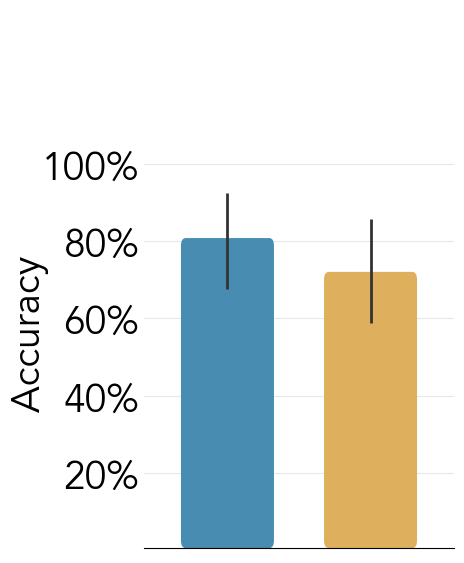

In [5]:
# compute contingency T and F
df_long_exp_2_contingency = get_contingency(df_long_exp_2, contingency="true_and_false")
# removing item 03 because its too ambiguous
df_long_exp_2_contingency = df_long_exp_2_contingency[~df_long_exp_2_contingency["item_id"].str.contains("03")]
# averaging across items to get worker level accuracy
df_long_exp_2_contingency = df_long_exp_2_contingency.groupby(['survey_type', 'worker_id'])['correct'].mean().reset_index()

condition = "backward_belief"# or backward_belief, forward_action
condition_capital = "Backward Belief" # or Backward Belief, Forward Action
types = ["true", "false"]

exp_2_data = {"Question": [], "Average Accuracy": [], "Type": [], "Error": []}


for type in types:
    accuracy = df_long_exp_2_contingency.groupby(["survey_type"])["correct"].mean()[f"{condition}_{type}"] # compute accuracy at survey level by averaging across workers
    ci = df_long_exp_2_contingency.groupby(["survey_type"])["correct"].agg(bootstrap_CI)[f"{condition}_{type}"] # CIs across worker-level accuracy
    exp_2_data["Question"].append(condition.title().replace("_", " "))
    exp_2_data["Average Accuracy"].append(accuracy)
    exp_2_data["Type"].append(type.title())
    exp_2_data["Error"].append(ci)

df = pd.DataFrame(exp_2_data)
df['Question'] = pd.Categorical(df['Question'], [condition_capital])
df.sort_values('Question', inplace=True)
change = 0.6 # used 0.6 in paper
colorblind_palette = sns.color_palette("colorblind", 10)

palette = {
    'True': change_saturation(colorblind_palette[0], change),    
    'False': change_saturation(colorblind_palette[1], change),    
}
df

plot_human_exp_2(df, palette, plot_dir=PLOT_DIR, condition=condition)

# Expert Ratings

In [6]:
# get median item ratings from df_expert grouped by expert 
print(f"Median Expert ratings\n{df_expert.groupby(['expert']).median()}")
print()
print(f"Mean Expert ratings\n{df_expert.groupby(['expert']).mean()}")
print()
print(f"Bootstrap CI Expert ratings\n{df_expert.groupby(['expert']).agg(bootstrap_CI)}")

Median Expert ratings
          desired_format  rating  item
expert                                
expert_1             1.0     5.0  49.0
expert_2             1.0     5.0  49.0

Mean Expert ratings
          desired_format    rating  item
expert                                  
expert_1        0.919192  4.333333  49.0
expert_2        0.959596  4.353535  49.0

Bootstrap CI Expert ratings
         desired_format          rating              item
expert                                                   
expert_1  (0.859, 0.97)  (4.131, 4.525)  (43.424, 54.576)
expert_2  (0.919, 0.99)  (4.182, 4.515)  (43.303, 54.465)
